In [79]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Introduction:
Wholesale Customer dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories. Number of Instances: 440 Number of Attributes: 8 Data Set Characteristics: Multivariate Attribute Characteristics: Integer

Objective:
The major aim is to perform clustering analysis using algorithms like hClust,PAM,kMeans,mclust and provide inferences accordingly.

Attribute Information:

FRESH: annual spending (m.u.) on fresh products (Continuous)
MILK: annual spending (m.u.) on milk products (Continuous)
GROCERY: annual spending (m.u.)on grocery products (Continuous)
FROZEN: annual spending (m.u.)on frozen products (Continuous)
DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous)
CHANNEL: customersale Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal)
REGION: customersale Region - Lisnon, Oporto or Other (Nominal)

In [82]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

Introduction: Wholesale Customer dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories. Number of Instances: 440 Number of Attributes: 8 Data Set Characteristics: Multivariate Attribute Characteristics: Integer

Objective: The major aim is to perform clustering analysis using algorithms like hClust,PAM,kMeans,mclust and provide inferences accordingly.

Attribute Information:

FRESH: annual spending (m.u.) on fresh products (Continuous) MILK: annual spending (m.u.) on milk products (Continuous) GROCERY: annual spending (m.u.)on grocery products (Continuous) FROZEN: annual spending (m.u.)on frozen products (Continuous) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous) CHANNEL: customersale Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal) REGION: customersale Region - Lisnon, Oporto or Other (Nominal)

In [81]:
from google.colab import files
uploaded = files.upload()

Saving Wholesale customers data.csv to Wholesale customers data (3).csv


In [83]:
#  read the CSV file and look at the first five rows of the data:
dataset = pd.read_csv('Wholesale customers data.csv')
dataset.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [85]:
print(dataset)

     Channel  Region  Fresh  ...  Frozen  Detergents_Paper  Delicassen
0          2       3  12669  ...     214              2674        1338
1          2       3   7057  ...    1762              3293        1776
2          2       3   6353  ...    2405              3516        7844
3          1       3  13265  ...    6404               507        1788
4          2       3  22615  ...    3915              1777        5185
..       ...     ...    ...  ...     ...               ...         ...
435        1       3  29703  ...   13135               182        2204
436        1       3  39228  ...    4510                93        2346
437        2       3  14531  ...     437             14841        1867
438        1       3  10290  ...    1038               168        2125
439        1       3   2787  ...      65               477          52

[440 rows x 8 columns]


In [86]:
#Print Total number of Rows & columns in dataset
print(dataset.shape)

(440, 8)


In [87]:
#Print Information about data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [88]:
dataset.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [93]:
types = dataset.dtypes
print(types)

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object


In [92]:
#Count total number of classes in Data
class_counts = dataset.groupby('Channel').size()
print(class_counts)

Channel
1    298
2    142
dtype: int64


In [94]:
#Count total number of classes in Data
class_counts = dataset.groupby('Region').size()
print(class_counts)

Region
1     77
2     47
3    316
dtype: int64


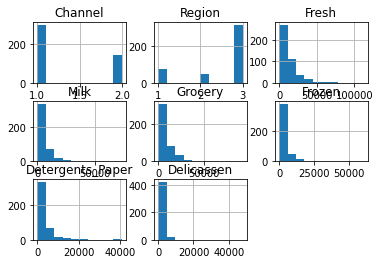

In [95]:
from matplotlib import pyplot
dataset.hist()
pyplot.show()

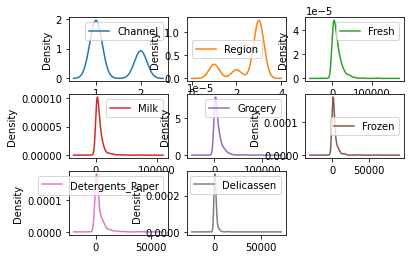

In [96]:
dataset.plot(kind='density' ,subplots=True, layout=(3,3), sharex=False)
pyplot.show()

In [97]:
dataset.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [98]:
# Extracting features of dataset

X = dataset.iloc[:,2:8].values

In [99]:
# Taking care of missing data
#handling missing data (Replacing missing data with the mean value)  
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.NAN, strategy= 'mean', fill_value=None, verbose=1, copy=True)
#Fitting imputer object to the independent variables x.   
imputer = imputer.fit(X[:, 2:8])
#Replacing missing data with the calculated mean value  
X[:, 2:8]= imputer.transform(X[:, 2:8])

In [100]:
print(X)


[[12669  9656  7561   214  2674  1338]
 [ 7057  9810  9568  1762  3293  1776]
 [ 6353  8808  7684  2405  3516  7844]
 ...
 [14531 15488 30243   437 14841  1867]
 [10290  1981  2232  1038   168  2125]
 [ 2787  1698  2510    65   477    52]]


In [101]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# statistics of scaled data
pd.DataFrame(X).describe()

,0,1,2,3,4,5
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [102]:
dataset.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [90]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.2)


In [91]:
import sklearn

sklearn.__version__


'0.24.2'

In [103]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

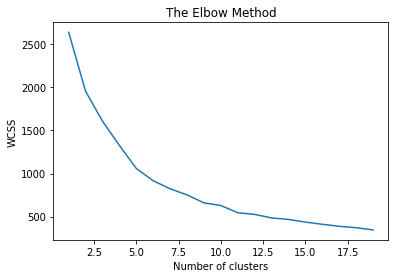

In [104]:
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


1.Specify number of clusters K.
2. Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.
3. Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.

In [106]:
# Fitting K-Means to the dataset
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
print(kmeans)
y_kmeans = kmeans.fit_predict(X)

KMeans(n_clusters=5, random_state=42)


In [107]:
frame = pd.DataFrame(X)
frame['cluster'] = y_kmeans
frame['cluster'].value_counts()

3    270
1     96
0     63
4     10
2      1
Name: cluster, dtype: int64

In [108]:
print("Within cluster sum of square when k=5", kmeans.inertia_)

Within cluster sum of square when k=5 1058.77125325701


In [109]:
print("center of Cluster are", kmeans.cluster_centers_ )

center of Cluster are [[ 1.65897027e+00 -1.08371983e-01 -2.17703067e-01  1.10347289e+00
  -4.04601989e-01  3.33024950e-01]
 [-4.94431759e-01  6.87784611e-01  9.11873238e-01 -3.31564429e-01
   9.07389458e-01  1.02422883e-01]
 [ 1.96681731e+00  5.17550306e+00  1.28721685e+00  6.90059988e+00
  -5.54861977e-01  1.64784475e+01]
 [-2.30202959e-01 -3.83683148e-01 -4.36547623e-01 -1.65012833e-01
  -3.97208366e-01 -1.93797294e-01]
 [ 3.13830315e-01  3.92190593e+00  4.27561037e+00 -3.57419457e-03
   4.61816580e+00  5.03365339e-01]]


In [110]:
print("Number of iterations", kmeans.n_iter_) 

Number of iterations 23


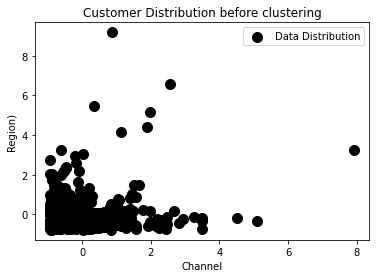

In [111]:
# Visualising the clusters
plt.scatter(X[:,0], X[:,1], s = 100, c = 'black', label = 'Data Distribution')
plt.title('Customer Distribution before clustering')
plt.xlabel('Channel')
plt.ylabel('Region)')
plt.legend()
plt.show()

In [113]:
frame = pd.DataFrame(X)
frame['cluster'] = y_kmeans
frame['cluster'].value_counts()

3    270
1     96
0     63
4     10
2      1
Name: cluster, dtype: int64

In [114]:
fresh=  1#@param {type:"number"}
milk = 10000 #@param {type:"number"}
grocery = 10000 #@param {type:"number"}
frozen = 25 #@param {type:"number"}
detergents= 1 #@param {type:"number"}
delicassen= 1 #@param {type:"number"}
predict= kmeans.predict(sc.transform([[ fresh,milk,grocery,frozen,detergents,delicassen]]))
print(predict)
if predict==[0]:
  print("Customer is misor")

elif predict==[1]:
  print("Customer is standard")
elif predict==[2]:
  print("Customer is Target")
elif predict==[3]:
  print("Customer is careful")

else:
  print("Custmor is sensible" )



[3]
Customer is careful


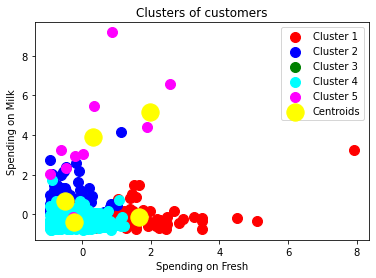

In [115]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans== 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Spending on Fresh')
plt.ylabel('Spending on Milk')
plt.legend()
plt.show()

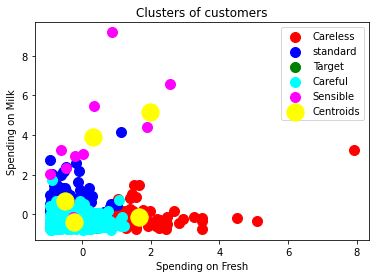

In [116]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Careless')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'standard')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Careful')
plt.scatter(X[y_kmeans== 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Spending on Fresh')
plt.ylabel('Spending on Milk')
plt.legend()
plt.show()

In [117]:
import pickle 
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(kmeans) 
  
# Load the pickled model 
Saved_Model = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
Saved_Model.predict(X)

array([3, 1, 1, 3, 0, 3, 3, 3, 3, 1, 1, 3, 0, 1, 1, 3, 1, 3, 3, 3, 3, 3,
       0, 1, 1, 3, 3, 3, 1, 0, 3, 3, 3, 0, 3, 1, 0, 1, 1, 0, 0, 3, 1, 1,
       1, 1, 1, 4, 1, 1, 3, 3, 0, 1, 3, 3, 4, 1, 3, 3, 3, 4, 3, 1, 3, 4,
       3, 1, 3, 3, 0, 0, 3, 0, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 4, 4, 0,
       3, 0, 3, 3, 4, 0, 1, 3, 3, 3, 3, 3, 1, 1, 3, 0, 3, 3, 1, 1, 3, 1,
       3, 1, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 1, 3, 3, 3, 0, 3, 3, 3, 3,
       3, 1, 1, 3, 3, 1, 1, 3, 3, 1, 3, 1, 1, 3, 3, 3, 1, 1, 3, 1, 3, 1,
       0, 3, 3, 3, 3, 0, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 0, 0, 1,
       3, 3, 1, 1, 0, 3, 3, 1, 3, 3, 3, 1, 3, 4, 3, 3, 1, 1, 1, 3, 1, 3,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 4, 3, 0, 1, 0, 3, 3, 0, 0, 3, 3, 3, 3,
       1, 1, 1, 3, 1, 3, 3, 3, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0,
       3, 3, 3, 0, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3,

In [119]:
import pickle 
print("[INFO] Saving model...")
# Save the trained model as a pickle string. 
saved_model=pickle.dump(kmeans,open('/content/drive/My Drive/kmclusterassignment.pkl', 'wb')) 
# Saving model to disk

[INFO] Saving model...


In [ ]:
# Load the pickled model 
model = pickle.load(open('/content/drive/My Drive/kmclusterassignment.pkl','rb'))  
# Use the loaded pickled model to make predictions 
model.predict(X)

array([4, 0, 0, 4, 1, 4, 4, 4, 4, 0, 0, 4, 1, 0, 0, 4, 0, 4, 4, 4, 4, 4,
       1, 0, 0, 4, 4, 4, 0, 1, 4, 4, 4, 1, 4, 0, 1, 0, 0, 1, 1, 4, 0, 0,
       0, 0, 0, 3, 0, 0, 4, 4, 1, 0, 4, 4, 3, 0, 4, 4, 4, 3, 4, 0, 4, 3,
       4, 0, 4, 4, 1, 1, 4, 1, 4, 4, 4, 0, 4, 4, 4, 0, 0, 4, 4, 3, 3, 1,
       4, 1, 4, 4, 3, 1, 0, 4, 4, 4, 4, 4, 0, 0, 4, 1, 4, 4, 0, 0, 4, 0,
       4, 0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 1, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 4, 4, 0, 4, 4, 4, 1, 4, 4, 4, 4,
       4, 0, 0, 4, 0, 0, 0, 4, 4, 0, 4, 0, 0, 4, 4, 4, 0, 0, 4, 0, 4, 0,
       1, 4, 4, 4, 4, 1, 0, 2, 4, 4, 4, 4, 0, 0, 4, 4, 4, 0, 4, 1, 1, 0,
       4, 4, 0, 0, 1, 4, 4, 0, 4, 4, 4, 0, 4, 3, 4, 4, 0, 0, 0, 4, 0, 4,
       4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 4,
       4, 4, 0, 0, 4, 4, 4, 4, 4, 3, 4, 1, 0, 1, 4, 4, 1, 1, 4, 4, 4, 4,
       0, 0, 0, 4, 0, 4, 4, 4, 4, 1, 4, 4, 1, 1, 4, 4, 4, 4, 1, 1, 1, 1,
       4, 4, 4, 1, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4,

In [ ]:
!pip install streamlit

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pyngrok

     |████████████████████████████████| 747kB 8.1MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.5-cp37-none-any.whl size=19246 sha256=a3af17bc6c7353b745655312b898f733b69c8d8d7c5d23326da60936f66663ed
  Stored in directory: /root/.cache/pip/wheels/0c/13/64/5ebbcc22eaf53fdf5766b397c1fb17c83f5775fdccf0ea1b88
Successfully built pyngrok


In [ ]:
!ngrok authtoken 1oEm0wopEJyjrT38ULluwUKK5fq_7ai4ZocZJ2YuFuoiJfoMh

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
%%writefile app.py
import streamlit as st 
from PIL import Image
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
st.set_option('deprecation.showfileUploaderEncoding', False)
# Load the pickled model
model = pickle.load(open('/content/drive/My Drive/kmeansclusterassignment.pkl','rb'))   
dataset= pd.read_csv('/content/drive/My Drive/Wholesale customers data.csv')
X = dataset.iloc[:,2:8].values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
def predict_note_authentication(chanel,region,fresh,milk,grocery,frozen,detergents,delicassen):
  predict= model.predict(sc.transform([[fresh,milk,grocery,frozen,detergents,delicassen]]))
  print("cluster number", predict)
  
def main():
    
    html_temp = """
   <div class="" style="background-color:blue;" >
   <div class="clearfix">           
   <div class="col-md-12">
   <center><p style="font-size:40px;color:white;margin-top:10px;">Poornima Institute of Engineering & Technology</p></center> 
   <center><p style="font-size:30px;color:white;margin-top:10px;">Department of Computer Engineering</p></center> 
   <center><p style="font-size:25px;color:white;margin-top:10px;"Machine Learning Lab Experiment</p></center> 
   </div>
   </div>
   </div>
   """
    st.markdown(html_temp,unsafe_allow_html=True)
    st.header("Customer Segmenation on wholesale data ")
    
    chanel = st.selectbox(
    "Chanel",
    ("1", "2")
    )
    region = st.selectbox(
    "Region",
    ("1", "2","3")
    )
    

if __name__=='__main__':
  main()

Overwriting app.py


In [ ]:
!nohup streamlit run  app.py &

nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok
url=ngrok.connect(port='8050')
url

<NgrokTunnel: "http://45a735228f74.ngrok.io" -> "http://localhost:80">

In [ ]:
!streamlit run --server.port 80 app.py


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:80
  External URL: http://34.73.89.4:80

cluster number [0]
  Stopping...


In [ ]:
ngrok.kill()